## Importing Libraries

This code snippet imports the pandas library as 'pd' for data manipulation and matplotlib.pyplot as 'plt' for visualization in Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Clean CSV: Remove Trailing Commas

This code reads a CSV file ('BSE Sensex Daily Close Jan1990 Oct2020.csv'), removes trailing commas from each line, and writes the modified content back to the file.

In [2]:
file_path = 'BSE Sensex Daily Close Jan1990 Oct2020.csv'

# Read the content of the file
with open(file_path, 'r') as f:
    lines = f.readlines()

# Remove trailing commas from each line
lines = [line.replace(',\n','\n') for line in lines]

# Write the modified content back to the file
with open(file_path, 'w') as f:
    f.writelines(lines)

## Read CSV into DataFrame

This code reads the CSV file 'BSE Sensex Daily Close Jan1990 Oct2020.csv' into a pandas DataFrame named `df`.

In [3]:
file_path = 'BSE Sensex Daily Close Jan1990 Oct2020.csv'
df = pd.read_csv(file_path)
df

,Date,Open,High,Low,Close
0,1-January-1990,NaN,NaN,NaN,783.35
1,2-January-1990,NaN,NaN,NaN,780.01
2,3-January-1990,NaN,NaN,NaN,763.22
3,4-January-1990,NaN,NaN,NaN,760.80
4,5-January-1990,NaN,NaN,NaN,774.58
...,...,...,...,...,...
7416,13-October-2020,40592.54,40786.82,40461.97,40625.51
7417,14-October-2020,40623.19,40880.25,40279.55,40794.74
7418,15-October-2020,41048.05,41048.05,39667.47,39728.41
7419,16-October-2020,39936.61,40125.71,39699.42,39982.98


## DataFrame Column Removal and Date Conversion

The code removes specified columns ('Open', 'High', 'Low') from the pandas DataFrame `df`. Additionally, it converts the 'Date' column to a datetime format using the `pd.to_datetime` function.

In [4]:
# List of columns to remove
columns_to_remove = ['Open', 'High', 'Low']
# Remove the specified columns
df = df.drop(columns=columns_to_remove)
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,Close
0,1990-01-01,783.35
1,1990-01-02,780.01
2,1990-01-03,763.22
3,1990-01-04,760.80
4,1990-01-05,774.58
...,...,...
7416,2020-10-13,40625.51
7417,2020-10-14,40794.74
7418,2020-10-15,39728.41
7419,2020-10-16,39982.98


## Analyzing Close Prices

This code identifies the dates and values for the maximum and minimum closing prices in the DataFrame `df`.

- **Maximum Closing Price:**
  - Date of Maximum Closing Price: `max_date`
  - Maximum Closing Price: `max_price`

- **Minimum Closing Price:**
  - Date of Minimum Closing Price: `min_date`
  - Minimum Closing Price: `min_price`

In [5]:
max_date = df.loc[df['Close'].idxmax()]['Date']
min_date = df.loc[df['Close'].idxmin()]['Date']

max_price = df['Close'].max()
min_price = df['Close'].min()

## Close Price Visualization

This code sets the plot size and visualizes the closing prices over time from the DataFrame `df`. Red and green dots mark the minimum and maximum closing prices, respectively.

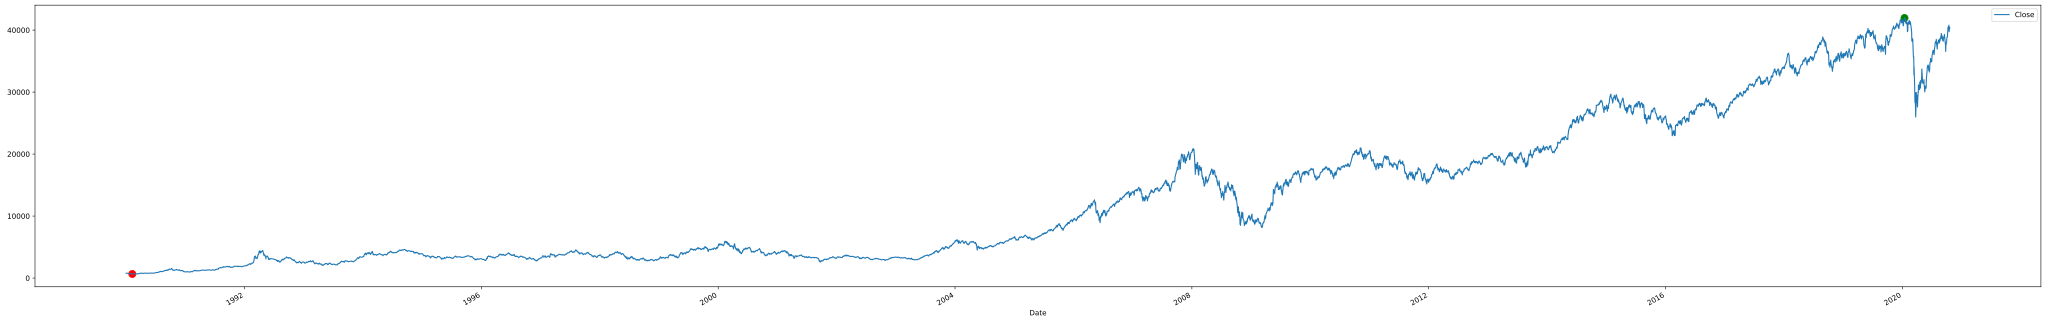

In [6]:
plt.rcParams['figure.figsize'] = [50, 8]
df.plot(x='Date', y='Close')
plt.scatter(min_date, df['Close'].min(), color='red', label='Min Date', s=100)
plt.scatter(max_date, df['Close'].max(), color='green', label='Max Date', s=100)

## Investment Amount

The initial `investment` amount is 100,000.

In [7]:
investment = 1_00_000

## Calculate Stock Count

Calculate the number of stocks that can be purchased with the given investment amount (`investment`) on the day of minimum price, by dividing the investment by the minimum closing price (`min_price`).

In [8]:
count_stocks = investment/min_price
count_stocks

151.67602002123465

## Calculate Return

Calculate the maximum return value by multiplying the count of stocks (`count_stocks`) bought on the day of minimum closing price with the maximum closing price (`max_price`) by selling the stocks on the day of maximum closing price

In [9]:
return_price =  count_stocks * max_price
return_price

6363207.947823449

## Profit Calculation

Calculates the profit by subtracting the initial investment from the return value obtained by multiplying the stock count with the maximum closing price.

In [10]:
profit = return_price - investment
profit

6263207.947823449

## Inference

We can see that the profit earned is around `62` times the investment made